In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
raw_data_csv = 'output.csv'
cleaned_data_csv = 'cleaned_output.csv'
outliers_data_csv = 'outliers_output.csv'

In [8]:
#
# clean the data
#

# Read the CSV file into a DataFrame
df = pd.read_csv(raw_data_csv)

# Convert the 'Ping Time' column to numeric data type
df['Ping Time'] = pd.to_numeric(df['Ping Time'], errors='coerce')

# Group the data by 'From' column
groups = df.groupby('From')

# Define a function to clean the data for each group
def clean_outliers(group):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = group['Ping Time'].quantile(0.25)
    Q3 = group['Ping Time'].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Identify the rows with 'Ping Time' values outside the bounds
    outliers = group[(group['Ping Time'] < lower_bound) | (group['Ping Time'] > upper_bound)]

    # Remove the rows with outliers
    cleaned_group = group[(group['Ping Time'] >= lower_bound) & (group['Ping Time'] <= upper_bound)]

    return cleaned_group, outliers

# Create empty DataFrames to store the cleaned data and outliers
cleaned_data = pd.DataFrame()
outliers_data = pd.DataFrame()

# Iterate over each group, clean the data, and append to the respective DataFrames
for name, group in groups:
    cleaned_group, outliers = clean_outliers(group)
    cleaned_data = cleaned_data.append(cleaned_group)
    outliers_data = outliers_data.append(outliers)

# Save the cleaned data and outliers to separate CSV files
cleaned_data.to_csv(cleaned_data_csv, index=False)
outliers_data.to_csv(outliers_data_csv, index=False)


Cleaned Data:
        Date     From                         From IP       To  \
50  6/3/2023  ping_CA  Unknown (IP of mobile hotspot)  Unknown   
51  6/3/2023  ping_CA  Unknown (IP of mobile hotspot)  Unknown   
52  6/3/2023  ping_CA  Unknown (IP of mobile hotspot)  Unknown   
53  6/3/2023  ping_CA  Unknown (IP of mobile hotspot)  Unknown   
55  6/3/2023  ping_CA  Unknown (IP of mobile hotspot)  Unknown   
..       ...      ...                             ...      ...   
42  6/3/2023  ping_CB  Unknown (IP of mobile hotspot)  Unknown   
45  6/3/2023  ping_CB  Unknown (IP of mobile hotspot)  Unknown   
46  6/3/2023  ping_CB  Unknown (IP of mobile hotspot)  Unknown   
47  6/3/2023  ping_CB  Unknown (IP of mobile hotspot)  Unknown   
49  6/3/2023  ping_CB  Unknown (IP of mobile hotspot)  Unknown   

             To_IP  Ping Time  TTL  
50   128.54.70.238    179.225   43  
51   128.54.70.238     55.004   43  
52   128.54.70.238     90.702   43  
53   128.54.70.238    387.719   43  
55   128

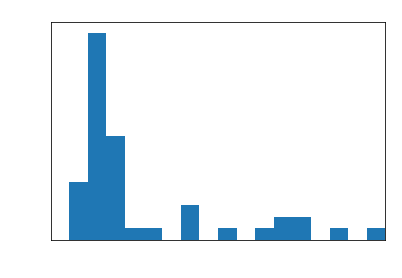

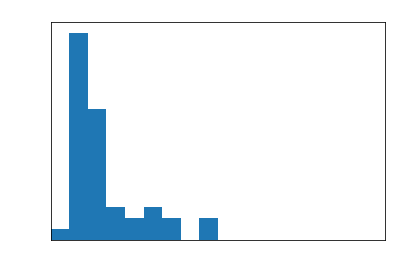

In [19]:
#
# Graph the clean data
#

# Read the CSV file
data = pd.read_csv(cleaned_data_csv)

# Group the data by 'From'
grouped_data = data.groupby('From')

x_min = 0
x_max = 450
bin_size = 25
# Plot separate histograms for each group
for group_name, group_data in grouped_data:
    # Extract the 'Ping Time' column for the current group
    ping_times = group_data['Ping Time']
    
    # Plot the histogram for the current group
    plt.hist(ping_times, bins=range(x_min, x_max + bin_size, bin_size))
    plt.xlabel('Ping Time', color='white')
    plt.ylabel('Frequency', color='white')
    plt.title(f'Distribution of Ping Time ({group_name})', color='white')
    plt.tick_params(colors='white')
    plt.gca().xaxis.set_tick_params(color='white')
    plt.gca().yaxis.set_tick_params(color='white')
    plt.xlim(x_min, x_max)  # Set the x-axis limits
    plt.show()
